In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# enter the right file name below. To browse over files of v2 reanalysis, check out 
# https://wci.earth2observe.eu/thredds/catalog-earth2observe-model-wrr2.html
# once you select a file, choose the OPeNDAP link and copy paste that below. The example below is WaterGAP model of Kassel, which
# proved to be one of the best performing models globally.
url = r'https://wci.earth2observe.eu/thredds/dodsC/univk/wrr2-monthly-agg.nc'

# Point shapefile provided below
fn = r'rivers/ne_110m_rivers_lake_centerlines.shp'

# variable name inside the OPeNDAP dataset
var_name = 'RivOut'

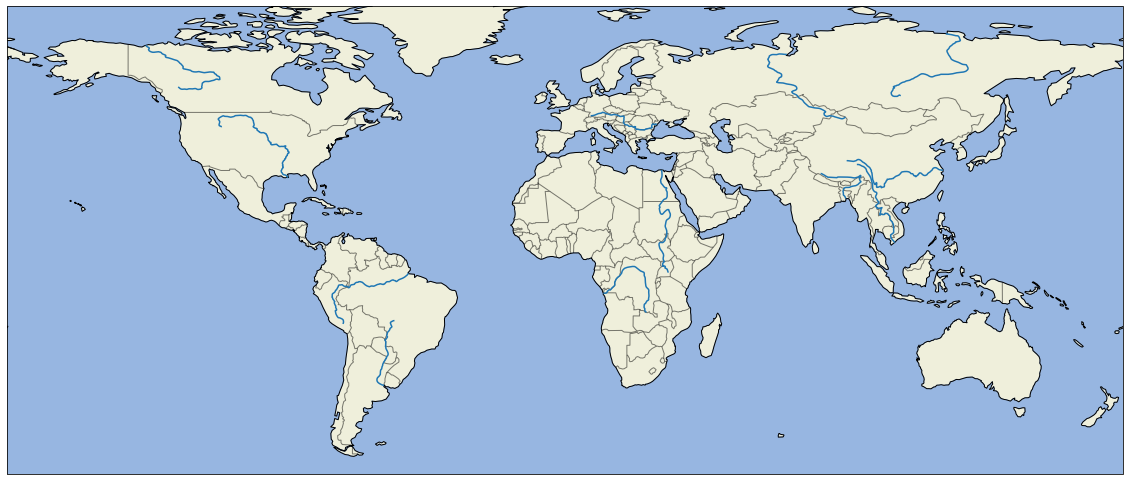

In [3]:
# first open shapefile and plot
gdf = gpd.read_file(fn)

plt.figure(figsize = (20, 10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
gdf.plot(ax=ax, transform=ccrs.PlateCarree())
ax.set_extent([-150, 60, -25, 60]);

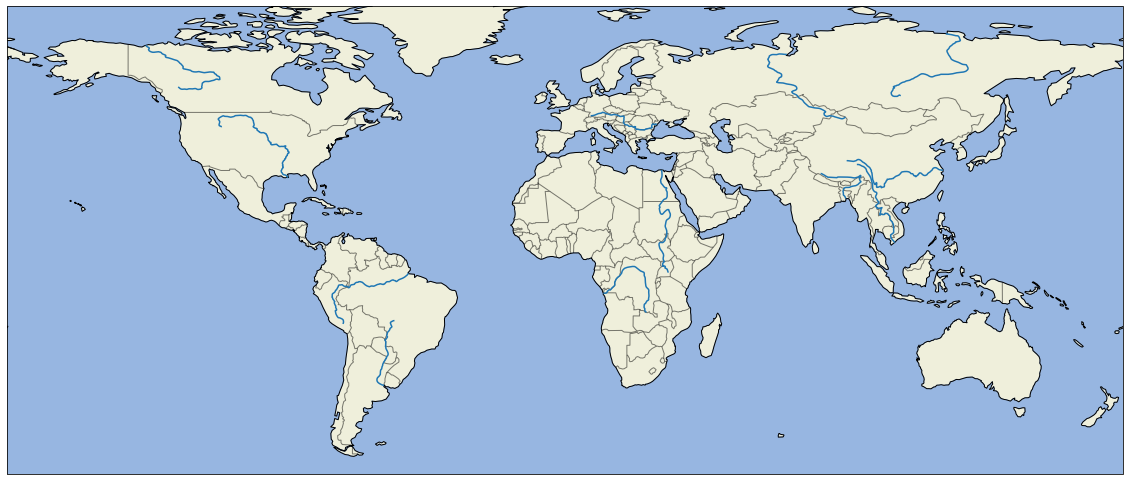

In [4]:
coords = np.array(gdf.iloc[1][31]) #MEKONG
coords = pd.DataFrame(coords, columns = ['x', 'y'])

# first open shapefile and plot
gdf = gpd.read_file(fn)

plt.figure(figsize = (20, 10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
gdf.plot(ax=ax, transform=ccrs.PlateCarree())
ax.set_extent([-150, 60, -25, 60]);

In [5]:
xs = list(coords['x'])
ys = list(coords['y'])

In [6]:
# looks good, now we retrieve the xy coordinates in separate lists for later use
# xs, ys = list(gdf.geometry.x.values), list(gdf.geometry.y.values)
# print(ys)

In [7]:
# now open the OPeNDAP link and plot one time slice just to see if everything works as expected
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 720, lon: 1440, time: 420)
Coordinates:
  * lon        (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat        (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * time       (time) datetime64[ns] 1980-01-16 1980-02-15 ... 2014-12-16
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    CanopInt   (time, lat, lon) float32 ...
    Evap       (time, lat, lon) float32 ...
    LAI        (time, lat, lon) float32 ...
    PotEvap    (time, lat, lon) float32 ...
    Precip     (time, lat, lon) float32 ...
    Qs         (time, lat, lon) float32 ...
    Qsb        (time, lat, lon) float32 ...
    Qsm        (time, lat, lon) float32 ...
    RivOut     (time, lat, lon) float32 ...
    RootMoist  (time, lat, lon) float32 ...
    Runoff     (time, lat, lon) float32 ...
    SWE        (time, lat, lon) float32 ...
    SnowFrac   (time, lat, lon) float32 ...
    SurfStor   (time, lat, lon) float32 ...
Attributes:
    _NCProperties:         version=1|netcdflibversion=4.4.1.1|hdf5libversion=...
    CDI:                   Climate Data Interface version 1.8.2 (http://mpime...
    history:               Tue May 16 16:39:10 2017: cdo mergetime /data/data...
    institution:           Center for Environmental Systems Research CESR, Un...
    Conventions:           CF-1.6
    title:                 Earth2Observe water resources reanalysis version 2...
    project:               EARTH2OBSERVE
    contact:               www.earth2observe.eu 
    id:                    e2o_univk_wrr2_glob15_day_CanopInt_1980-1989.nc4
    naming_authority:      earth2observe.eu
    Metadata_Conventions:  Unidata Dataset Discovery v1.0
    summary:               Water resources analysis version 2 preformed by Wa...
    keywords:              Earth2Observe, reanalysis, ERA-Interim, WFDEI, Wat...
    comment:               -
    creator_name:          Gabriel Fink
    creator_url:           http://www.usf.uni-kassel.de/cesr/
    creator_email:         fink@cesr.de
    acknowledgment:        The EartH2Observe project has received funding fro...
    publisher_name:        Center for Environmental Systems Research CESR, Un...
    publisher_url:         http://www.usf.uni-kassel.de/cesr/
    publisher_email:       fink@cesr.de
    cdm_data_type:         grid
    references:            -
    license:               This file is made available under the Open Databas...
    NCO:                   "4.6.2"
    CDO:                   Climate Data Operators version 1.8.2rc1 (http://mp...
    _CoordSysBuilder:      ucar.nc2.dataset.conv.CF1Convention
    frequency:             mon

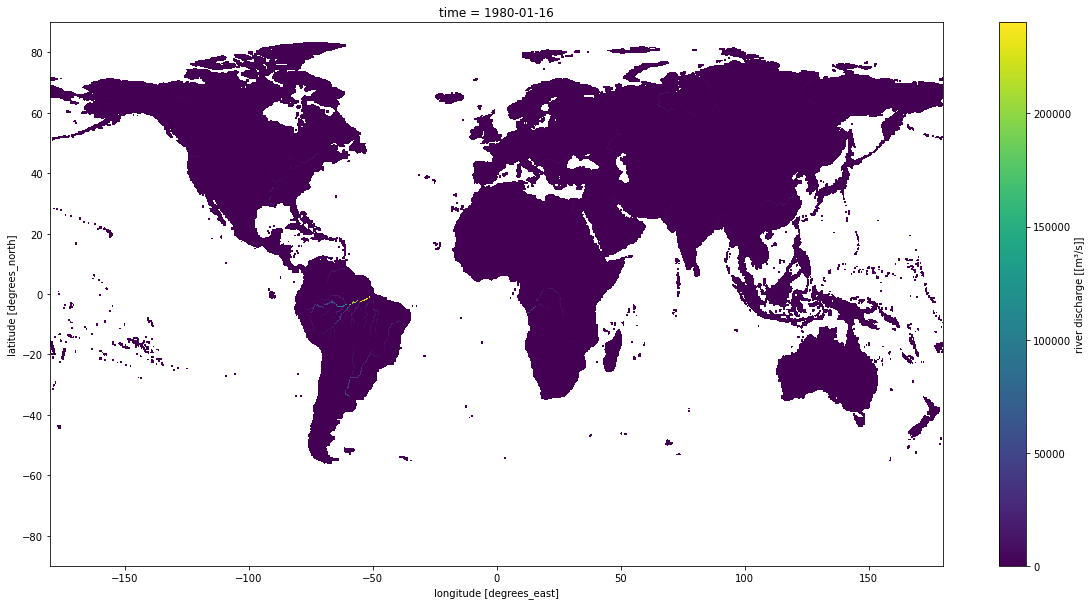

In [8]:
ds[var_name][0].plot(figsize = (20, 10));

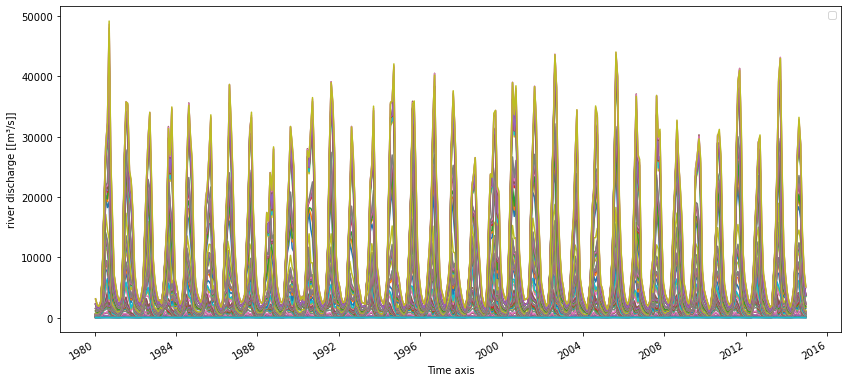

In [9]:
plt.figure(figsize = (14, 6))
ds_sel = xr.concat(([ds[var_name].sel(lon=x, lat=y, method='nearest') for x, y in zip(xs, ys)]), dim = ys)
ds_sel.plot.line(x='time')
plt.legend([]);

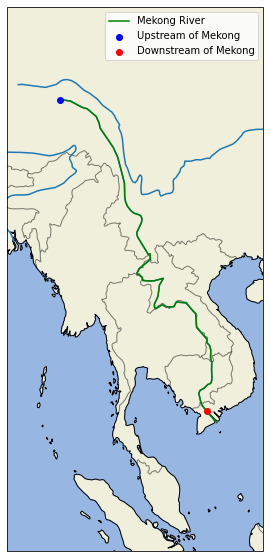

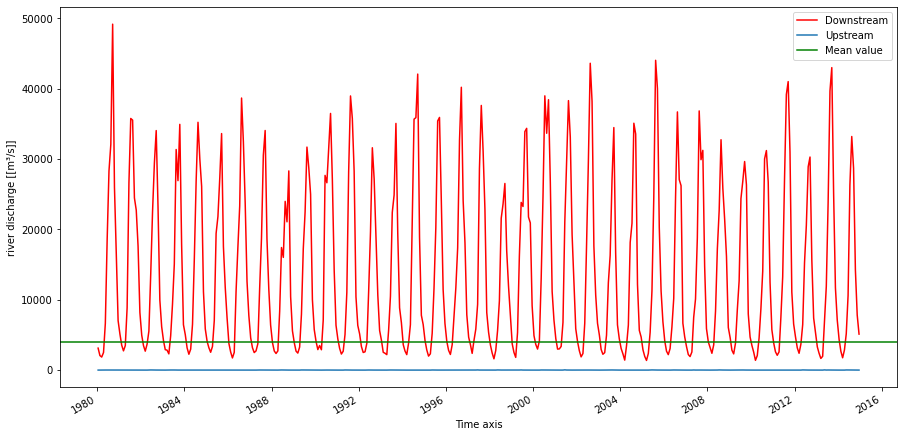

In [10]:
plt.figure(figsize = (10, 10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
gdf.plot(ax=ax, transform=ccrs.PlateCarree())
plt.scatter(xs[0], ys[0], color = 'blue', zorder = 10, label = 'Upstream of Mekong')
plt.scatter(xs[-2], ys[-2], color = 'red', zorder = 10, label = 'Downstream of Mekong')
plt.plot(coords['x'], coords['y'], color = 'green', zorder = 9, label = 'Mekong River')
plt.legend()
ax.set_extent([90, 110, 0, 40])

plt.figure(figsize = (15, 7))
ds_sel[-2].plot(label = 'Downstream', color = 'red')
ds_sel[0].plot(label = 'Upstream')
plt.axhline(ds_sel.mean(), color = 'green', label = 'Mean value')
plt.title("")
plt.legend();

In [11]:
for n in range(len(ds_sel)):
    fn_out = r'out\timeseries_{:02d}.csv'.format(n + 1)
    df = ds_sel[n].drop(['lat', 'lon']).to_dataframe().rename(columns={'RivOut': 'flow_{:02d}'.format(0)})
    df.to_csv(fn_out)